## Overview

This notebook compares the gene classification performance of GNNs (GCN and GraphSAGE)
before (old) and after (new) the hyperparameter tuning. In particular, the new settings,
the following hyperparameters are tuned based on the overall validation performance,
more details can be founed in the `hyperparameters_tuning.ipynb` notebook.

- Hidden dimension
- Number of graph convolution layers
- Residual (skip-sum) connection
- Learning rate
- Dropout rate
- Weight decay

We show that the validation performance of GNNs after careful tuning improved over the
previous settings, but only by a small amount (~0.01 for GCN and ~0.05 for GraphSAGE).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Load data

In [2]:
old_df = pd.read_csv("gene_classification_gnn_old.csv")
new_df = pd.read_csv("gene_classification_gnn_new.csv")
old_df, new_df = old_df.align(new_df, join="inner")

In [3]:
# Construct diff-view (new results - old results)
diff_df = new_df.copy()
columns = ["Training score", "Validation score", "Testing score"]
diff_df[columns] -= old_df[columns]

diff_df["Network_Dataset"] = diff_df[["Network", "Dataset"]].apply("_".join, axis=1)

### Analyze performance differences between new (tuned) and old GNN results

In [4]:
diff_df.groupby("Method", as_index=False).mean(numeric_only=True)

,Method,Training score,Validation score,Testing score
0,gcn,0.466907,0.009625,0.034831
1,sage,0.380006,0.051948,0.060071


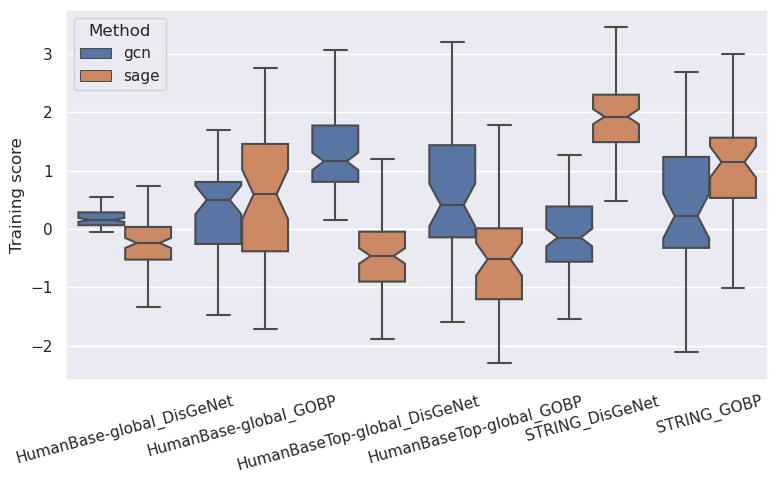

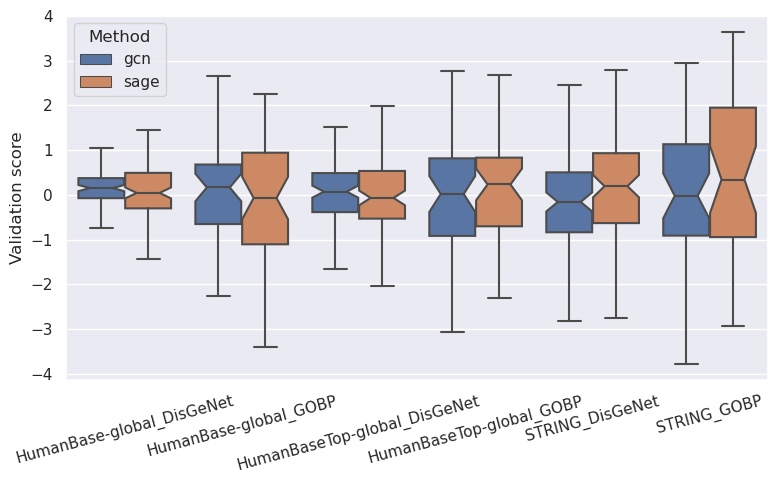

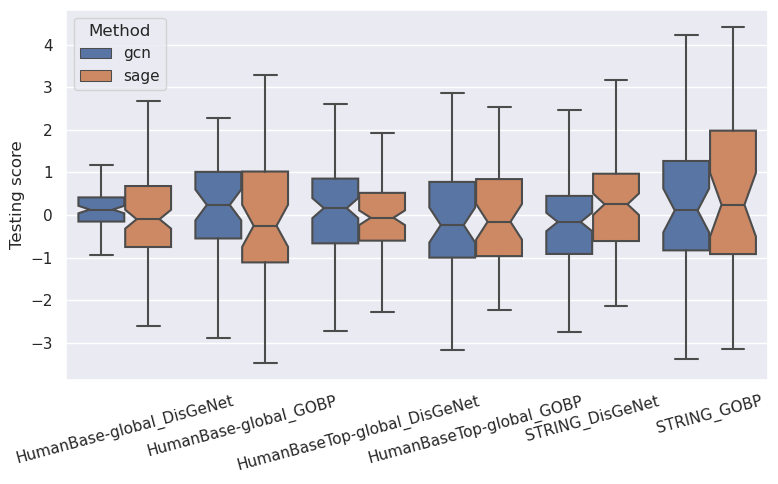

In [5]:
for score_type in ["Training score", "Validation score", "Testing score"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=diff_df,
        x="Network_Dataset",
        y=score_type,
        hue="Method",
        notch=True,
        showfliers=False,
    )
    plt.xlabel("")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()